# Business Finance Analysis

I want to performe some analysis on the accounts for my business.

In [1]:
#import libs
import pandas as pd

#Enable inline plots
%matplotlib inline

#List the files in the work folder
from subprocess import check_output
print(check_output(["ls", "../work"]).decode("utf8"))

Business Finances.ipynb
IBNK1117.CSV
Test.ipynb
Untitled.ipynb



In [2]:
#Read in the banking file.
#The file is in csv format, but has no headers

df = pd.read_csv('../work/IBNK1117.CSV', header=None, names=['tranDate', 'description', 'ref', 'amnt', 'bal'])

In [3]:
#Change the negative amounts to positive
df['amnt'] = df['amnt'].abs()

#Convert transaction date to a date type
df['tranDate'] = pd.to_datetime(df['tranDate'], format='%d%b%Y')

In [4]:
#Get info on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
tranDate       167 non-null datetime64[ns]
description    167 non-null object
ref            58 non-null object
amnt           167 non-null float64
bal            167 non-null float64
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 6.6+ KB


In [5]:
#Examine the first few rows
df.head()

,tranDate,description,ref,amnt,bal
0,2017-11-28,S/O to Hailey Smith,NaN,800.00,13917.16
1,2017-11-28,S/O to Martin Smith,NaN,812.00,14717.16
2,2017-11-27,R/P to Martin Smith,NaN,785.50,15529.16
3,2017-11-24,Giro: Just Retirement Mws Consulting Ltd,NaN,14169.41,16314.66
4,2017-11-22,DD to Hiscox Dd,0374551/0006464725,45.00,2145.25


In [6]:
df.describe()

,amnt,bal
count,167.000000,167.000000
mean,1763.645988,9514.446287
std,3297.692928,6708.327502
min,5.450000,-700.540000
25%,74.540000,3796.250000
50%,400.000000,8705.700000
75%,1125.000000,14934.430000
max,14813.470000,26382.410000


In [7]:
#Split off the transaction type from the beginning of the description
df['tranType'] = df['description'].str.split(' ').str[0]
df.head()

,tranDate,description,ref,amnt,bal,tranType
0,2017-11-28,S/O to Hailey Smith,NaN,800.00,13917.16,S/O
1,2017-11-28,S/O to Martin Smith,NaN,812.00,14717.16,S/O
2,2017-11-27,R/P to Martin Smith,NaN,785.50,15529.16,R/P
3,2017-11-24,Giro: Just Retirement Mws Consulting Ltd,NaN,14169.41,16314.66,Giro:
4,2017-11-22,DD to Hiscox Dd,0374551/0006464725,45.00,2145.25,DD


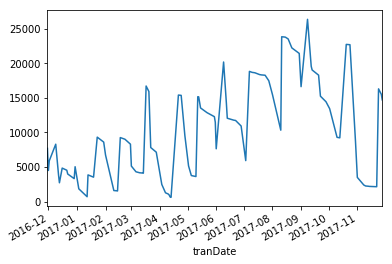

In [8]:
balance = df['bal'].groupby(df['tranDate']).max()
balance.plot()

In [9]:
#Group transaction amounts in to 3 bins Small, Medium and Large
bins = [0, 100, 1000, 20000]
labels = ['Small', 'Medium', 'Large']
df['expensesize'] = pd.cut(df['amnt'], bins, labels=labels)
df.head()

,tranDate,description,ref,amnt,bal,tranType,expensesize
0,2017-11-28,S/O to Hailey Smith,NaN,800.00,13917.16,S/O,Medium
1,2017-11-28,S/O to Martin Smith,NaN,812.00,14717.16,S/O,Medium
2,2017-11-27,R/P to Martin Smith,NaN,785.50,15529.16,R/P,Medium
3,2017-11-24,Giro: Just Retirement Mws Consulting Ltd,NaN,14169.41,16314.66,Giro:,Large
4,2017-11-22,DD to Hiscox Dd,0374551/0006464725,45.00,2145.25,DD,Small


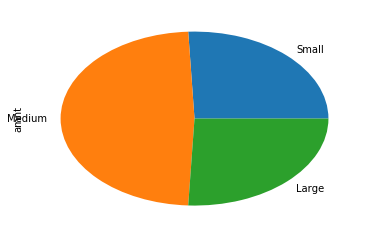

In [10]:
#Group by and then display a pie chart of number of transactions per transaction group
trans = df['amnt'].groupby(df['expensesize']).count()
trans.plot(kind='pie')

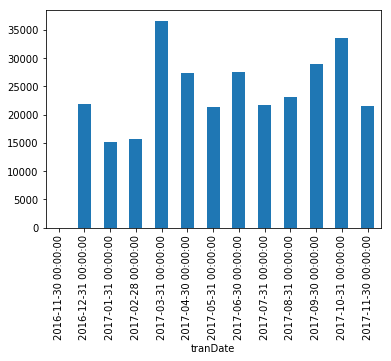

In [11]:
#Group and sum amounts by month of transaction
transAmntPerMonth = df.groupby(pd.Grouper(key='tranDate', freq='M'))['amnt'].sum()
transAmntPerMonth.plot(kind='bar')